In [2]:
import numpy as np
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

# <center>**Read Images**</center>

In [129]:
##image_files = glob('D:/Datasets/Covid 19 Dataset/COVID-19_Radiography_Dataset/Normal/images/*.png')
image_files = glob('D:/Datasets/Cats Dogs/PetImages/Dog/*.jpg')

In [233]:
img = Image.open(image_files[4])
np.array(img).shape

(375, 500, 3)

# <center>**Image Preprocessing**</center>

In [234]:
%run ./ImagePreprocessing/point_processing.ipynb
%run ./ImagePreprocessing/rgb_to_gray.ipynb

In [235]:
gray_img = convertToGray1(img)
neg_img = negativeImage(gray_img)

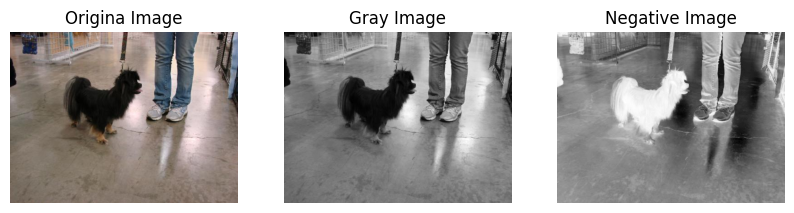

In [236]:
fig, axes = plt.subplots(1, 3, figsize=(10,10))

axes[0].imshow(img)
axes[0].set_title('Origina Image')

axes[1].imshow(gray_img, cmap='gray')
axes[1].set_title('Gray Image')

axes[2].imshow(neg_img, cmap='gray')
axes[2].set_title('Negative Image')

for axe in axes:
    axe.axis('off')

# <center>**Feature Extraction**</center>

In [237]:
%run ./FeatureExtraction/glcm.ipynb
from skimage.feature import graycomatrix, graycoprops

In [238]:
GRAY_LEVEL = 256

glcm_matrix = grayLevelCoMatrix(gray_img, distance=1, angle=0, levels=GRAY_LEVEL)
normalized_glcm = normalizedGrayLevelCoMatrix(gray_img, distance=1, angle=0, levels=GRAY_LEVEL)

ski_glcm = graycomatrix(np.array(gray_img), [1], [0], 256, normed=False)

(-0.5, 255.5, 255.5, -0.5)

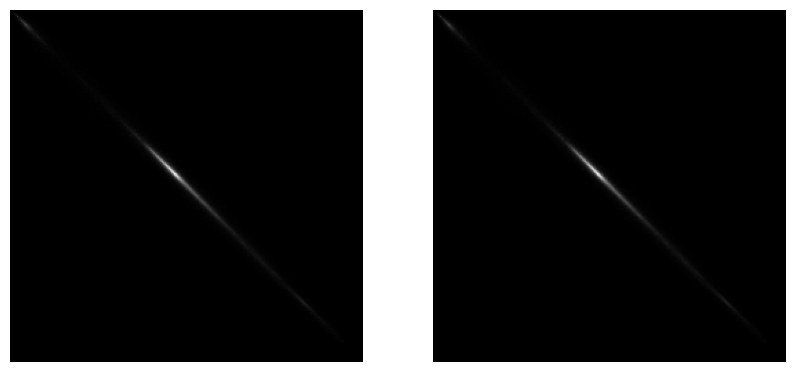

In [239]:
""" fig, axes = plt.subplots(1, 2, figsize=(10, 10))

img_nor1 = np.array(normalized_glcm * 255)
img_nor1 = img_nor1 / np.max(normalized_glcm)

img_nor2 = np.squeeze(ski_glcm, axis=(2,3)) * 255
img_nor2 = img_nor2 / np.max(ski_glcm)

axes[0].imshow(img_nor1, cmap='gray')
axes[0].axis('off')
axes[1].imshow(img_nor2, cmap='gray')
axes[1].axis('off') """

In [240]:
energy = getEnergyFeature(normalized_glcm)
print(energy)

ski_energy = graycoprops(ski_glcm, 'energy')
print(ski_energy[0][0])

0.03139359946630474
0.03139359946630502


In [176]:
asm = getASMFeature(normalized_glcm)
print(asm)
ski_asm = graycoprops(ski_glcm, 'ASM')
print(ski_asm[0][0])

0.000355508348248503
0.00035550834824848987


In [242]:
contrast = getContrastFeature(normalized_glcm)
print(contrast)

ski_contrast = graycoprops(ski_glcm, 'contrast')
print(contrast)

106.11993587173842
106.11993587173842


In [241]:
dissimilarity = getDissimilarityFeature(normalized_glcm)
print(dissimilarity)

ski_dissimilarity = graycoprops(ski_glcm, 'dissimilarity')
print(ski_dissimilarity[0][0])

4.198738810955301
4.198738810955243


In [179]:
homogeneity = getHomogeneityFeature(normalized_glcm)
print(homogeneity)

ski_homogeneity = graycoprops(ski_glcm, 'homogeneity')
print(ski_homogeneity[0][0])

0.25494045159594514
0.2549404515959449
